# Anomaly detection

### Import libraries, read data and analyse the amount of data and features

In [18]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
import warnings
warnings.filterwarnings("ignore")
 
data = loadmat('ex8data1.mat')  
X = data['X']   

print(f'X shape: {X.shape}')

X shape: (307, 2)


### Visualise the dataset and look for anomalies

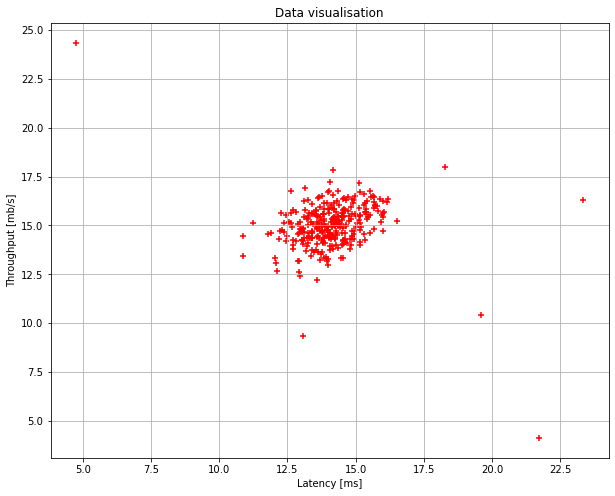

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], marker="+", c='r')
plt.title('Data visualisation')
plt.xlabel('Latency [ms]')
plt.ylabel('Throughput [mb/s]')
plt.grid()
plt.show()

Anomalie są widoczne w postci punktów rozrzuconych w odległości od skupiska punktów.

### Plot the histogram for features: throughput (mb/s) and latency (ms)

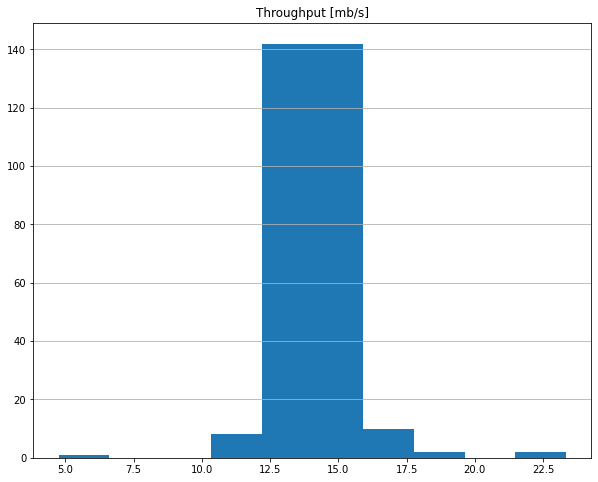

In [37]:
plt.figure(figsize=(10,8))
plt.hist(X[:,0])
plt.title('Throughput [mb/s]')
plt.grid(axis='y')
plt.show()

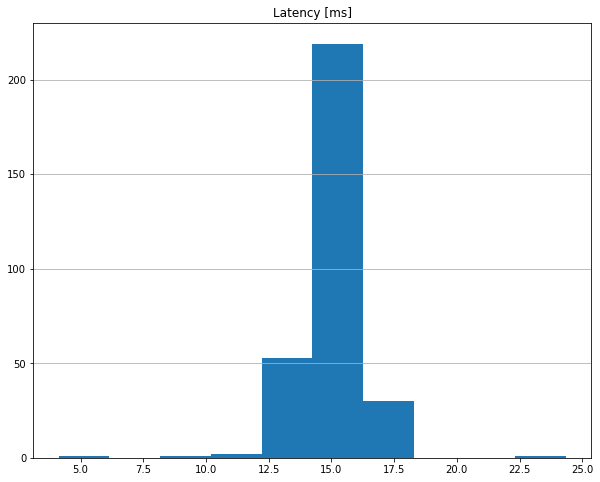

In [38]:
plt.figure(figsize=(10,8))
plt.hist(X[:,1])
plt.title('Latency [ms]')
plt.grid(axis='y')
plt.show()

### Gaussian distribution

In [39]:
def estimate_gaussian(X): 
    sigma, mu = np.zeros(X.shape[1]), np.zeros(X.shape[1])

    for c in range(X.shape[1]):
        sigma[c] = np.std(X[:,c])
        mu[c] = np.mean(X[:,c])
    return mu, sigma

# calculate mu and sigma and run the function for dataset
mu = estimate_gaussian(X)[0]
print(f'Mu: {mu}')

sigma = estimate_gaussian(X)[1]
print(f'Sigma: {sigma}')

Mu: [14.11222578 14.99771051]
Sigma: [1.35374717 1.3075723 ]


### Calculate probability

In [40]:
# check the number of data (X.shape)
Xval = data['Xval']  
yval = data['yval']

print(f'Xval shape: {Xval.shape}')
print(f'yval shape: {yval.shape}')

Xval shape: (307, 2)
yval shape: (307, 1)


In [41]:
from scipy import stats

mu, sigma = estimate_gaussian(X)

pX = np.zeros((X.shape))
pX[:, 0] = stats.norm.pdf(X[:, 0], mu[0], np.sqrt(sigma[0]))
pX[:, 1] = stats.norm.pdf(X[:, 1], mu[1], np.sqrt(sigma[1]))

pval = np.zeros((Xval.shape))
pval[:,0] = stats.norm.pdf(Xval[:,0], loc=mu[0], scale=np.sqrt(sigma[0]))
pval[:,1] = stats.norm.pdf(Xval[:,1], loc=mu[1], scale=np.sqrt(sigma[1]))


In [42]:
pX[:50, 0]

array([0.22545823, 0.28556744, 0.34199349, 0.27030008, 0.30841758,
       0.33834631, 0.18542704, 0.13890116, 0.07254606, 0.15843577,
       0.34082112, 0.3425531 , 0.2827785 , 0.28332357, 0.34063921,
       0.34248682, 0.34002418, 0.32798392, 0.31573608, 0.07395018,
       0.30498649, 0.34087543, 0.26130127, 0.34027994, 0.19751596,
       0.14560113, 0.31362143, 0.28563371, 0.31480055, 0.32535859,
       0.16370273, 0.34050514, 0.20884804, 0.19710109, 0.08917366,
       0.26843576, 0.1259566 , 0.34278312, 0.32075623, 0.34134253,
       0.32254388, 0.23830333, 0.32333135, 0.34225226, 0.29961697,
       0.33325234, 0.09184329, 0.34285157, 0.33400586, 0.18331924])

### Selecting the threshold

In [35]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval):
    best_f1 = 0

    for thresh in list(np.linspace(pval.min(), pval.max(), 10000)):
        y = (pval[:, 0] <= thresh) | (pval[:, 1] <= thresh)
        f1s = f1_score(yval, y)
        if f1s > best_f1:
            best_f1 = f1s
            best_epsilon = thresh
    return best_epsilon, best_f1

best_epsilon, best_f1 = select_threshold(pval, yval)
print(f'Best epsilon value: {best_epsilon}\nBest f1 value: {best_f1}')

Best epsilon value: 6.978313623558666e-05
Best f1 value: 0.8750000000000001


### Anomaly detection result

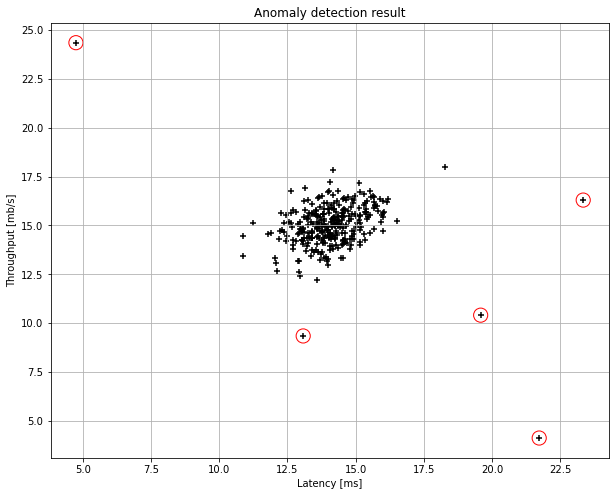

In [46]:
y = ((pX[:,0] < best_epsilon) | (pX[:,1] < best_epsilon))
markers = [X[n] for n in np.where(y == 1)][0]

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1],marker='+',c='k')
plt.scatter(markers[:,0], markers[:,1], s=200, facecolors='none', edgecolors='r')

plt.title('Anomaly detection result')
plt.xlabel('Latency [ms]')
plt.ylabel('Throughput [mb/s]')
plt.grid()
plt.show()

Widzimy, że detekcja nie została przeprowadzona w pełni poprawnie, ale zdecydowana większość anomalii została wykryta.